In [1]:
import importlib
import dbops
import numpy as np
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
import glob

In [2]:
importlib.reload(dbops)  # Reload the module from source

<module 'dbops' from '/scratch/u1319464/Data-Mining-Spring-2025-Project/dbops.py'>

In [23]:
movie_ref = dbops.Movie.iterate_all_movies()[13]
str(movie_ref)

'Tarantula'

In [16]:
imdb_id = movie_ref.get_imdb_id()
title = movie_ref.get_title()
frame_idx_timeline = []
num_faces_timeline = []
color_timeline = []
emotion_timeline = []
for frame_ref in tqdm(movie_ref.iterate_frames()):
    # if not frame_ref.is_fully_cached():
    #     print(f'Uncached frame found: {frame_ref.frame_index}')
    
    frame_idx_timeline.append(frame_ref.frame_index)
    try:
        num_faces_timeline.append(frame_ref.get_num_faces())
    except:
        num_faces_timeline.append(0)
    
    c = frame_ref.get_average_color()
    color_timeline.append(c)

    frame_emotions = []
    for face_ref in frame_ref.iterate_faces():
        frame_emotions.append(face_ref.get_emotion_embedding())
    
    emotion_timeline.append(frame_emotions)


color_timeline = np.array(color_timeline)


100%|██████████████████████████████████████████████████████████████████████████████████████████| 3320/3320 [00:14<00:00, 231.79it/s]


Text(0.5, 1.0, 'Overall Processing Progress of "Sahara"')

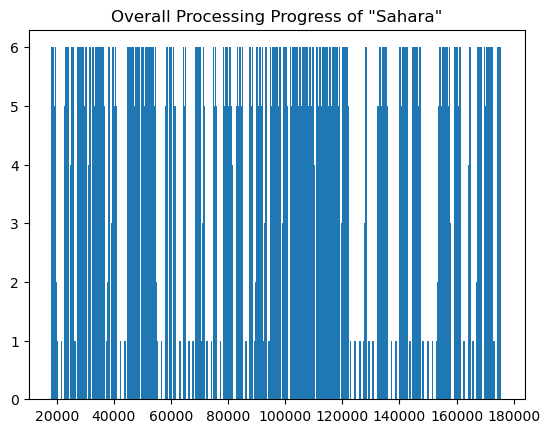

In [17]:
plt.hist(
    frame_idx_timeline,
    bins=15*60 # for every interval of ~15 seconds
)
plt.title(f'Overall Processing Progress of "{title}"')

In [18]:
[len(x) for x in [frame_idx_timeline, num_faces_timeline, color_timeline, emotion_timeline]]

[3320, 3320, 3320, 3320]

In [19]:
draw_order = np.argsort(np.linalg.norm(color_timeline, axis=1))


x


3320it [00:00, 1295959.91it/s]


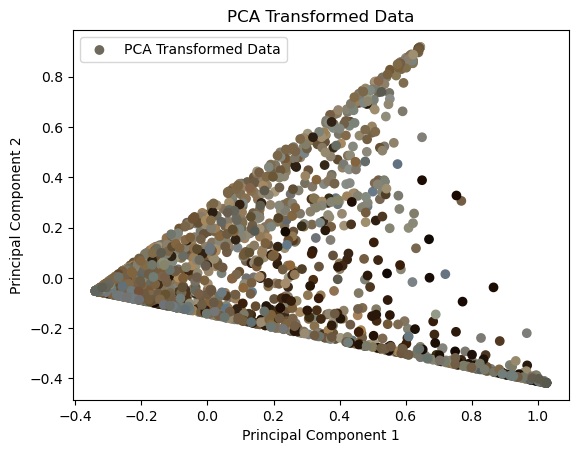

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Sample data
X = np.concatenate([ np.stack(j) for j in emotion_timeline if not len(j)==0 ])

# Initialize PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
print('x')

colors = []
for color_timeline_i, emotion_timeline_i in tqdm(zip(color_timeline, emotion_timeline)):
    for _ in range(len(emotion_timeline_i)):
        colors.append(color_timeline_i)
        
plt.scatter(X_pca[:, 0], X_pca[:, 1], color=np.array(colors)/255, label='PCA Transformed Data')

plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.show()

In [21]:
X_pca.shape

(2769, 2)

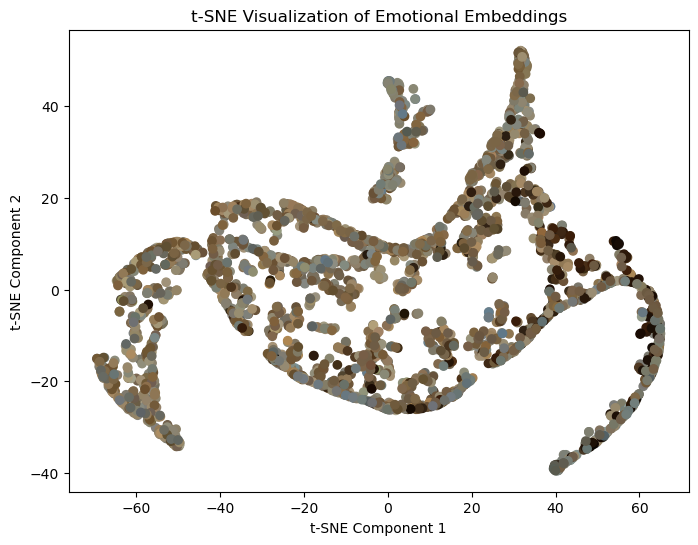

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Step 2: Apply t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Step 3: Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], color=np.array(colors)/255)

# plt.colorbar(scatter, ticks=range(len(), label='Species')
plt.title('t-SNE Visualization of Emotional Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()